In [1]:
import pandas as pd
import numpy as np
from scipy.interpolate import interp1d
from scipy.stats import spearmanr, linregress, pearsonr, rankdata
import matplotlib.pyplot as plt
import seaborn as sns
from predict_comb_therapy_effect import *

In [4]:
df1 = import_survival_data('../data/NSCLC/Peters2017/PFS_1L_Atezo_TC23.csv')
df2 = import_survival_data('../data/NSCLC/Peters2017/PFS_2L_Atezo_TC23.csv')
df3 = import_survival_data('../data/NSCLC/Peters2017/PFS_3L_Atezo_TC23.csv')

In [5]:
f1 = interpolate(df1)
f2 = interpolate(df2)
f3 = interpolate(df3)

In [6]:
N = 5000
timepoints = np.flip(np.linspace(0, min(df2['Time'].max(), df3['Time'].max()), num=N))

In [7]:
f3_data = f3(timepoints)
f3_data[-25:] = 100

/Users/haeun/miniconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:609: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]


In [8]:
df23 = pd.DataFrame({'Time': timepoints, 'Survival': 0.75 * f2(timepoints) + 0.25 * f3_data})
f23 = interpolate(df23)

In [22]:
df23.to_csv('../data/Peters2017/PFS_2L_75_3L_25_Atezo_TC23.csv', index=False)

In [10]:
phase3 = import_survival_data('../data/NSCLC/NSNSCLC_atezo_Rittmeyer2017_TC23.csv')

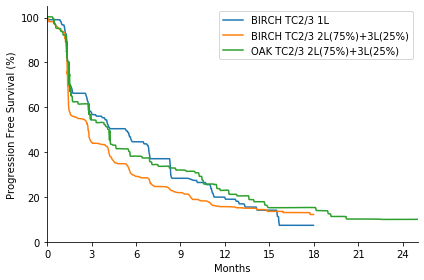

In [21]:
fig, ax = plt.subplots(figsize=(6, 4))
sns.despine()
sns.lineplot(x='Time', y='Survival', data=df1,
             label="BIRCH TC2/3 1L", ax=ax)
#sns.lineplot(x='Time', y='Survival', data=df2,
#             label="BIRCH TC2/3 2L", ax=ax)
#sns.lineplot(x='Time', y='Survival', data=df3,
#             label="BIRCH TC2/3 3L", ax=ax)
sns.lineplot(x='Time', y='Survival', data=df23,
             label="BIRCH TC2/3 2L(75%)+3L(25%)", ax=ax)
sns.lineplot(x='Time', y='Survival', data=phase3,
             label="OAK TC2/3 2L(75%)+3L(25%)", ax=ax)
ax.set_ylim(0, 105)
ax.set_xlim(0, 25)
ax.set_xticks(np.arange(0, 25, step=3))
ax.set_xlabel("Months")
ax.set_ylabel('Progression Free Survival (%)')
fig.tight_layout()
fig.savefig('../analysis/PFS_123L_Atezo_TC23_v5_withOAK.pdf')

In [27]:
diff = f1(3) - f23(3)

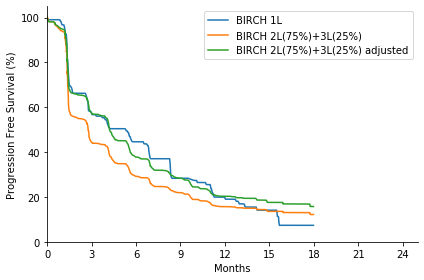

In [30]:
fig, ax = plt.subplots(figsize=(6, 4))
sns.despine()
sns.lineplot(x='Time', y='Survival', data=df1,
             label="BIRCH 1L", ax=ax)
sns.lineplot(x='Time', y='Survival', data=df23,
             label="BIRCH 2L(75%)+3L(25%)", ax=ax)
sns.lineplot(x='Time', y='Survival', data=adjust_response(df23, 3, f1(3)),
             label="BIRCH 2L(75%)+3L(25%) adjusted", ax=ax)
ax.set_ylim(0, 105)
ax.set_xlim(0, 25)
ax.set_xticks(np.arange(0, 25, step=3))
ax.set_xlabel("Months")
ax.set_ylabel('Progression Free Survival (%)')
fig.tight_layout()
fig.savefig('../analysis/NSCLC/Atezo_line_treatment/PFS_123L_Atezo_TC23_v4_adjusted.pdf')

In [11]:
cutoff_idx = df1[df1['Time'] < 3]['Survival'].idxmin()
df1.loc[cutoff_idx, :]

Time         2.997492
Survival    57.505467
Name: 620, dtype: float64

In [20]:
print(f1(3))
print(f2(3))
print(f3(3))
print(f23(3))

57.45475328154718
44.389349506315774
44.30610741443221
44.368538983344884


In [9]:
atezo = import_survival_data('../data/NSCLC/NSNSCLC_atezo_Rittmeyer2017.csv')

In [25]:
adjust_response(atezo, 3, 60).to_csv('../analysis/NSCLC/NSNSCLC_atezo_Rittmeyer2017_PFS_3mo-60-adjusted.csv', index=False)